In [1]:
import pandas as pd

/home/kxinyue/.local/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_20231224.csv')

# DAY 4

In [3]:
df.head()

,Period,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,...,Electric Savings,Borough,Latitude,Longitude,Community Board,Council District,BIN,BBL,Census Tract (2020),Neighborhood Tabulation Area (NTA) (2020)
0,FY2018,"139 ACA Realty, Inc.",Eitan Chandally,barbara@dial7.com,7187076123,43-23 35th Street,Long Island City,NY,11101,Commercial,...,NaN,QUEENS,40.745706,-73.929565,402.0,26.0,4003160.0,4.002220e+09,17902.0,QN0202
1,FY2018,"141 Lake Avenue Realty c/o JR Produce, Inc.",Josef Raz,jrproduce@gmail.com,7183708782,141 Lake Avenue,Staten Island,NY,10303,Wholesale/Warehouse/Distribution,...,NaN,STATEN IS,40.632845,-74.151048,501.0,49.0,5146740.0,5.011610e+09,239.0,SI0107
2,FY2018,14-10 123rd Street LLC,Danica/Ivan Drazic,ddrazic@atjelectrical.com,7183210117,14-10 123rd Street,College Point,NY,11356,Commercial,...,NaN,QUEENS,40.785144,-73.844833,407.0,19.0,4098344.0,4.040850e+09,929.0,QN0701
3,FY2018,183 Lorriane Street LLC,Tom Sapienza,tsapienza@KLCNY.com,2128405588,183 Lorraine Street,Brooklyn,NY,11231,Wholesale/Warehouse/Distribution,...,NaN,BROOKLYN,40.673106,-74.002300,306.0,38.0,3336622.0,3.005720e+09,5302.0,BK0601
4,FY2018,"21st Century Optics, Inc.",Ralph Woythaler,rwoythaler@21st centuryoptics.com,7183922310,47-00 33rd Street,Lond Island City,NY,11101,Manufacturing,...,NaN,QUEENS,40.742386,-73.932148,402.0,26.0,4003447.0,4.002520e+09,19901.0,QN0202


* How many different companies are represented in the data set?

In [4]:
N_companies = df['Company Name'].nunique()

* What is the total number of jobs created for businesses in Queens?

In [5]:
N_jobs_Queens = df[df['Borough'] == 'QUEENS']['Job created'].sum()


* How many different unique email domains names are there in the data set?

In [6]:
emails = df['company email']
domains = emails.str.split('@').str[1]
N_unique_domain = domains.nunique()

* Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA? 

In [7]:
df_NTA = df.groupby(['Neighborhood Tabulation Area (NTA) (2020)']).agg({'Total Savings':'mean', 'Job created':'sum'})

In [8]:
df_NTA_5 = df_NTA[df['Neighborhood Tabulation Area (NTA) (2020)'].value_counts() >= 5]

/tmp/ipykernel_1189205/2471725676.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_NTA_5 = df_NTA[df['Neighborhood Tabulation Area (NTA) (2020)'].value_counts() >= 5]


In [9]:
df_NTA_5.head()

,Total Savings,Job created
Neighborhood Tabulation Area (NTA) (2020),,
BK0101,10367.961795,16.0
BK0102,12599.753333,15.0
BK0103,19150.922857,0.0
BK0104,21158.253077,187.0
BK0201,15102.036364,0.0


In [10]:
df_NTA_5.to_csv('NTA.csv')

# DAY 5

* scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings. 
#### average savings??? 


In [11]:
import matplotlib.pyplot as plt

In [12]:
df.columns

Index(['Period', 'Company Name', 'company contact', 'company email',
       'company phone', 'Address', 'City', 'State', 'Postcode', 'Industry',
       'Industry descr', 'Company Type', 'Current fulltime', 'Job created',
       'Job retain', 'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Gas Savings',
       'Cogen savings', 'Electric Savings', 'Borough', 'Latitude', 'Longitude',
       'Community Board', 'Council District', 'BIN', 'BBL',
       'Census Tract (2020)', 'Neighborhood Tabulation Area (NTA) (2020)'],
      dtype='object')

[None,
 (0.1, 1000000.0),
 Text(0, 0.5, 'Average Savings per Job'),
 Text(0.5, 0, 'Jobs Created'),
 Text(0.5, 1.0, 'Log Scale Average Savings')]

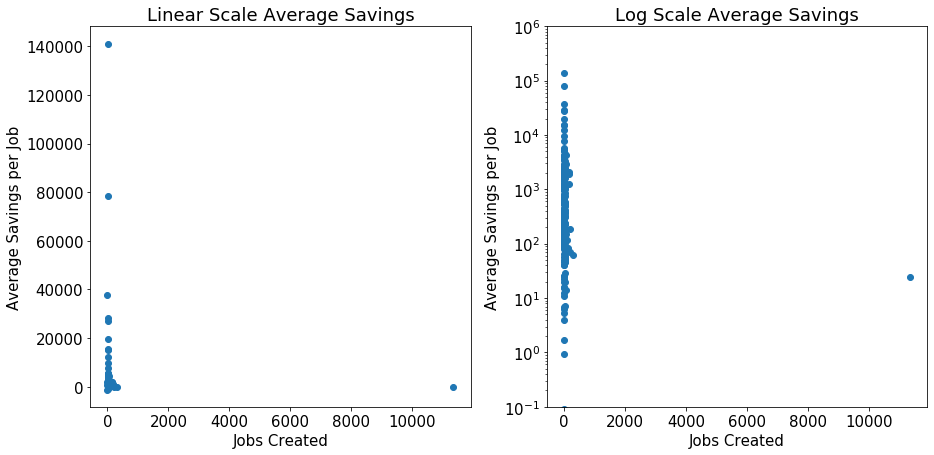

In [13]:
fig = plt.figure(figsize = (15, 7))
plt.rcParams.update({'font.size': 15})
ax1 = fig.add_subplot(121)
ax1.scatter(df['Job created'], df['Total Savings']/df['Job created']);
ax1.set(xlabel = 'Jobs Created', ylabel = 'Average Savings per Job', title = 'Linear Scale Average Savings')
ax2 = fig.add_subplot(122)
ax2.scatter(df['Job created'], df['Total Savings']/df['Job created']);
ax2.set(xlabel = 'Jobs Created', ylabel = 'Average Savings per Job', yscale = 'log', ylim = (1e-1,1e6), title = 'Log Scale Average Savings')


* histogram of the log of the average total savings.

/home/kxinyue/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


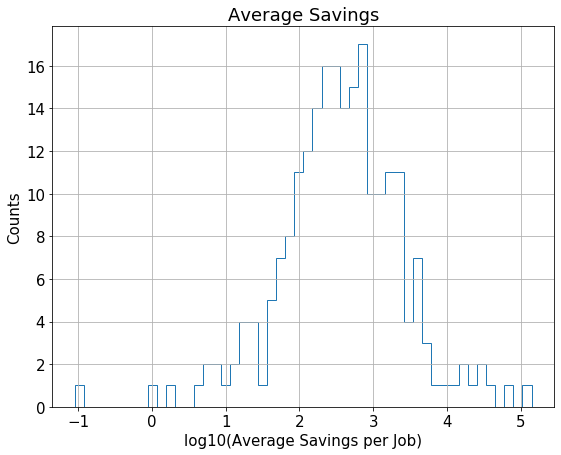

In [14]:
import numpy as np
fig = plt.figure(figsize = (9,7))
average_savings = df['Total Savings']/df['Job created']
mask1 = np.isnan(average_savings)
mask2 = average_savings == 0
plt.hist(np.log10(average_savings[(~mask1) & (~mask2)]),bins = 50, histtype = 'step');
plt.xlabel('log10(Average Savings per Job)')
plt.ylabel('Counts')
plt.title('Average Savings')
plt.grid()


* line plot of the total jobs created for each month.

In [15]:
df['Effective Month'] = df['Effective Date'].str[6:] + '/' + df['Effective Date'].str[:2]
df_jobs_month = df.groupby('Effective Month').agg({'Job created':'sum'})

In [16]:
df_jobs_month.reset_index(inplace=True)

In [17]:
df_jobs_month.head()

,Effective Month,Job created
0,1993/02,25.0
1,1993/04,10.0
2,1994/04,15.0
3,1998/10,17.0
4,2000/04,0.0


In [18]:
import altair as alt
alt.Chart(df_jobs_month).mark_line().encode(
    x='Effective Month',
    y='Job created'
)


alt.Chart(...)